In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

from sklearn import metrics
from sklearn.model_selection import train_test_split


plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)




In [29]:
df = pd.read_csv('../capstone-data/weekly-merged.csv')

In [33]:
df['date'] = pd.to_datetime(df['date'])

In [39]:
df = df.set_index('date').asfreq('W-Mon')

In [ ]:
df

In [40]:
df.index.duplicated().sum()

0

In [42]:
df.index

DatetimeIndex(['2001-01-01', '2001-01-08', '2001-01-15', '2001-01-22',
               '2001-01-29', '2001-02-05', '2001-02-12', '2001-02-19',
               '2001-02-26', '2001-03-05',
               ...
               '2021-10-04', '2021-10-11', '2021-10-18', '2021-10-25',
               '2021-11-01', '2021-11-08', '2021-11-15', '2021-11-22',
               '2021-11-29', '2021-12-06'],
              dtype='datetime64[ns]', name='date', length=1093, freq='W-MON')

In [49]:
df = df.drop(df.tail(1).index)

In [50]:
# Code modified from code written by Matthew Garton.

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

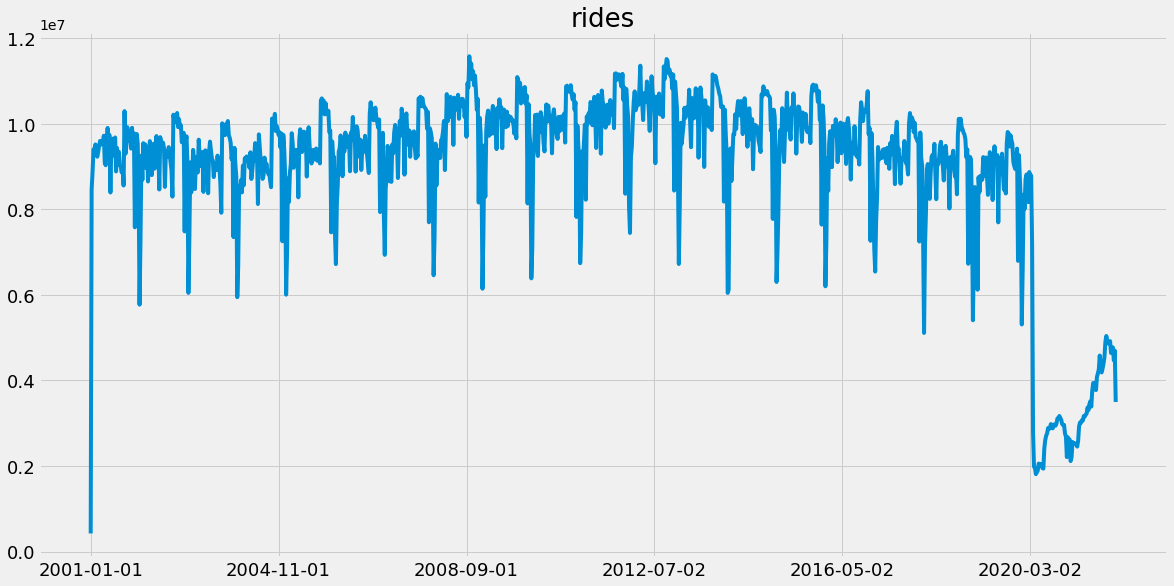

In [51]:
plot_series(df,['total_rides'], title='rides',steps=200)

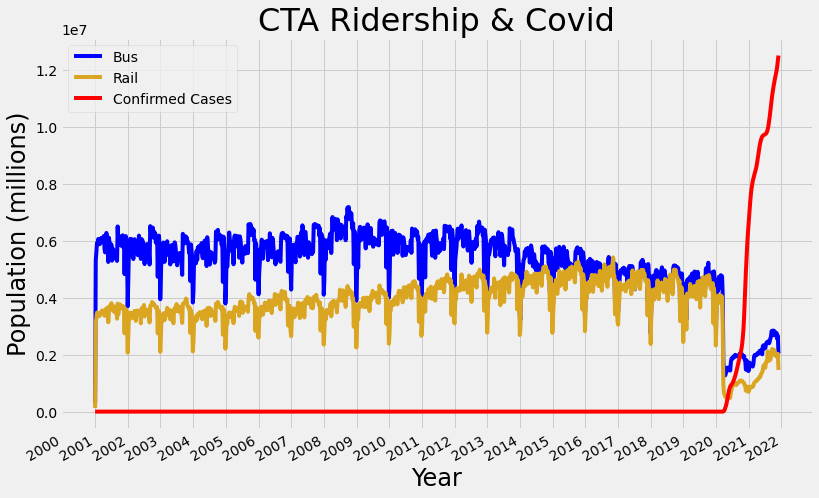

In [52]:
plt.figure(figsize=(12,8))

plt.plot(df['bus'],label='Bus',color='blue',)
plt.plot(df['rail_boardings'],label='Rail',color='goldenrod',);
plt.plot(df['ConfirmedCases'],label='Confirmed Cases',color='red',)

plt.title('CTA Ridership & Covid',size=32)
plt.xlabel('Year',size=24)
plt.ylabel('Population (millions)',size=24)
plt.legend();

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate() # Rotation
plt.show()


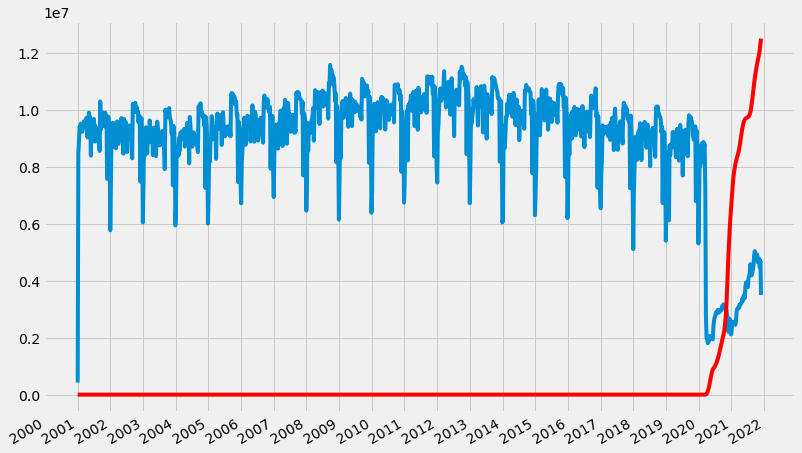

In [53]:
plt.figure(figsize=(12,8))

plt.plot(df['total_rides'],label='Rail',);
plt.plot(df['ConfirmedCases'],label='Confirmed Cases',color='red',)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate() # Rotation
plt.show()


In [54]:
decomp = seasonal_decompose(df['total_rides'].dropna())


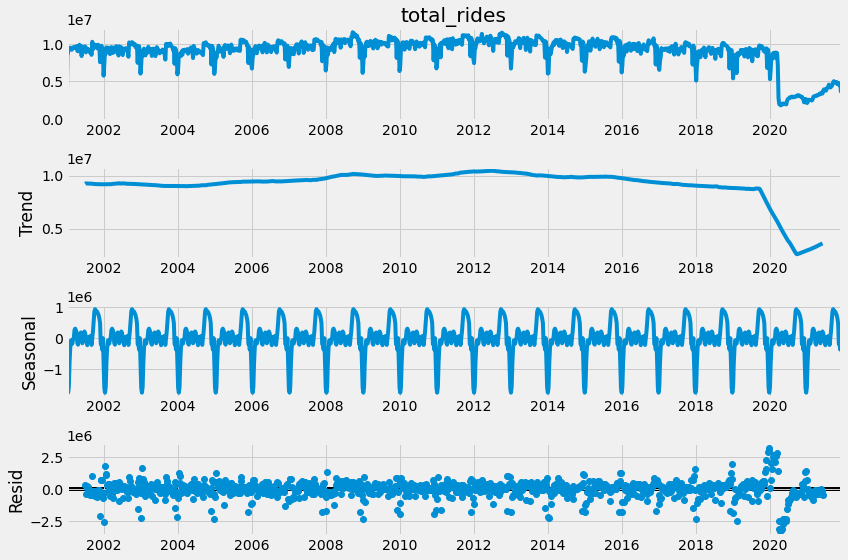

In [55]:
rcParams['figure.figsize'] = (12, 8)
decomp.plot();

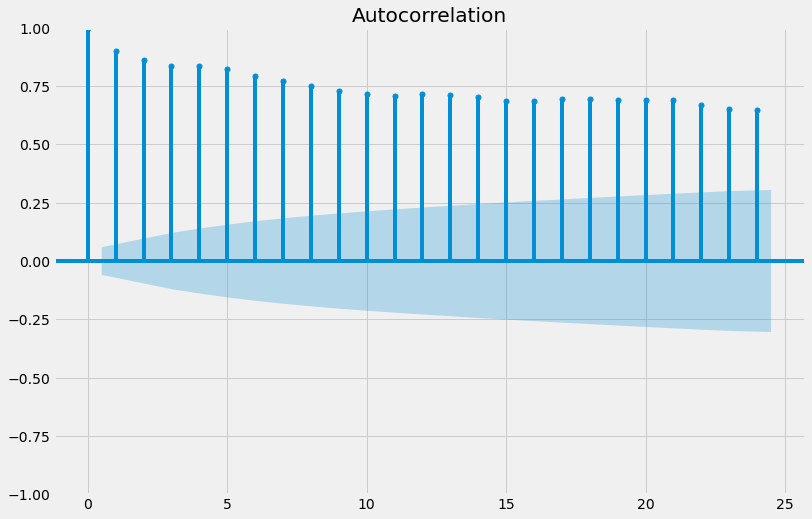

In [56]:
plot_acf(df['total_rides'],lags=24);

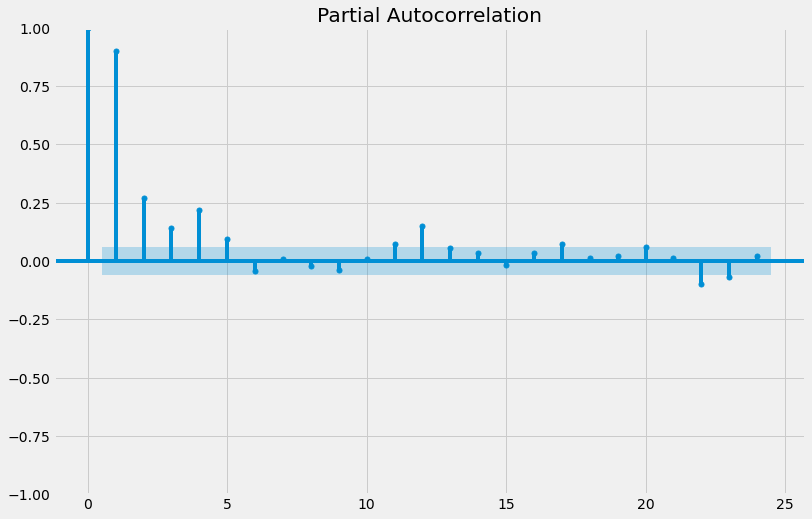

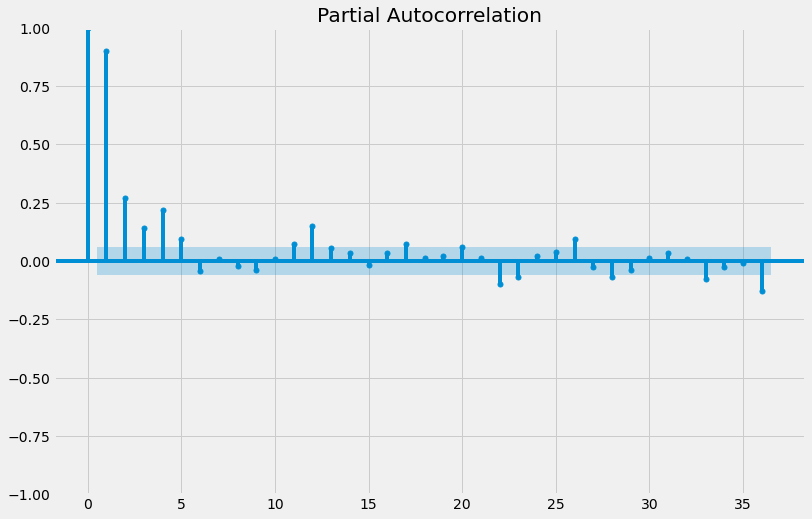

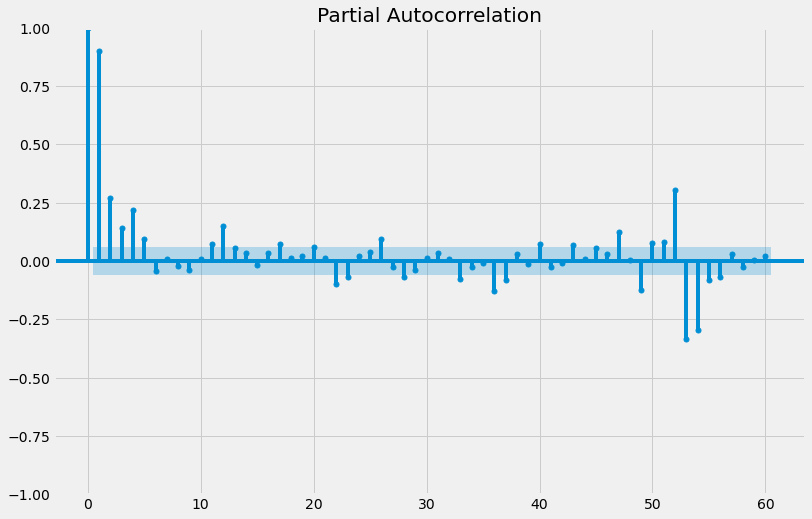

In [58]:
plot_pacf(df['total_rides'], lags=24,method='ywm');
plot_pacf(df['total_rides'], lags=36,method='ywm');
plot_pacf(df['total_rides'], lags=60,method='ywm');


In [147]:
test = df[['total_rides']].copy()

In [144]:
test['3_lags'] = df['total_rides'].shift(54)
test.corr()

,total_rides,3_lags
total_rides,1.000000,0.330505
3_lags,0.330505,1.000000


In [156]:
test['lag_1'] = test['total_rides'].shift(1)
test['lag_2'] = test['total_rides'].shift(2)
test['lag_3'] = test['total_rides'].shift(3)
test['lag_14'] = test['total_rides'].shift(14)
test['lag_52'] = test['total_rides'].shift(52)

test['time'] = range(0, df.shape[0])

In [157]:
test.corr()

,total_rides,lag_1,lag_2,lag_3,lag_14,lag_52,time
total_rides,1.000000,0.615491,0.597581,0.591339,0.597624,0.679940,-0.358479
lag_1,0.615491,1.000000,0.614233,0.596270,0.442562,0.364329,-0.356540
lag_2,0.597581,0.614233,1.000000,0.613005,0.488323,0.362360,-0.354637
lag_3,0.591339,0.596270,0.613005,1.000000,0.479556,0.359019,-0.352736
lag_14,0.597624,0.442562,0.488323,0.479556,1.000000,0.458885,-0.330508
lag_52,0.679940,0.364329,0.362360,0.359019,0.458885,1.000000,-0.212575
time,-0.358479,-0.356540,-0.354637,-0.352736,-0.330508,-0.212575,1.000000


In [158]:
X_train,X_test,y_train,y_test = train_test_split(test.drop(columns={'total_rides',}),test['total_rides'],test_size=.2,shuffle=False)

In [159]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_train.head()

,const,lag_1,lag_2,lag_3,lag_14,lag_52,time
date,,,,,,,
2001-01-01,1.0,NaN,NaN,NaN,NaN,NaN,0
2001-01-08,1.0,423647.0,NaN,NaN,NaN,NaN,1
2001-01-15,1.0,1575927.0,423647.0,NaN,NaN,NaN,2
2001-01-22,1.0,1087994.0,1575927.0,423647.0,NaN,NaN,3
2001-01-29,1.0,1604713.0,1087994.0,1575927.0,NaN,NaN,4


In [160]:
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]


lm = sm.OLS(y_train,X_train)

lm_results = lm.fit()

lm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_rides   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     153.5
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          3.77e-130
Time:                        03:50:26   Log-Likelihood:                -11086.
No. Observations:                 821   AIC:                         2.219e+04
Df Residuals:                     814   BIC:                         2.222e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.862e+05   7.68e+04      2.423      0.016    3.54e+04    3.37e+05
lag_1          0.0670      0.025      2.719      0.007       0.019       0.115
lag_2          0.0174      0.024      0.714      0.475      -0.030       0.065
lag_3          0.0401      0.024      1.640      0.101      -0.008       0.088
lag_14         0.0608      0.025      2.392      0.017       0.011       0.111
lag_52         0.7016      0.025     28.015      0.000       0.652       0.751
time         -32.6957     26.846     -1.218      0.224     -85.392      20.000
==============================================================================
Omnibus:                      369.057   Durbin-Watson:                   2.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4153.201
Skew:                          -1.729   Prob(JB):                         0.00
Kurtosis:                      13.462   Cond. No.                     4.23e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
metrics.r2_score(y_test,lm_results.predict(X_test))

0.2740570651642126

In [162]:
metrics.mean_squared_error(y_test,lm_results.predict(X_test),squared=False)

426985.2514042307

Initial and basic testing shows we are off by just under 200,000 riders per day.

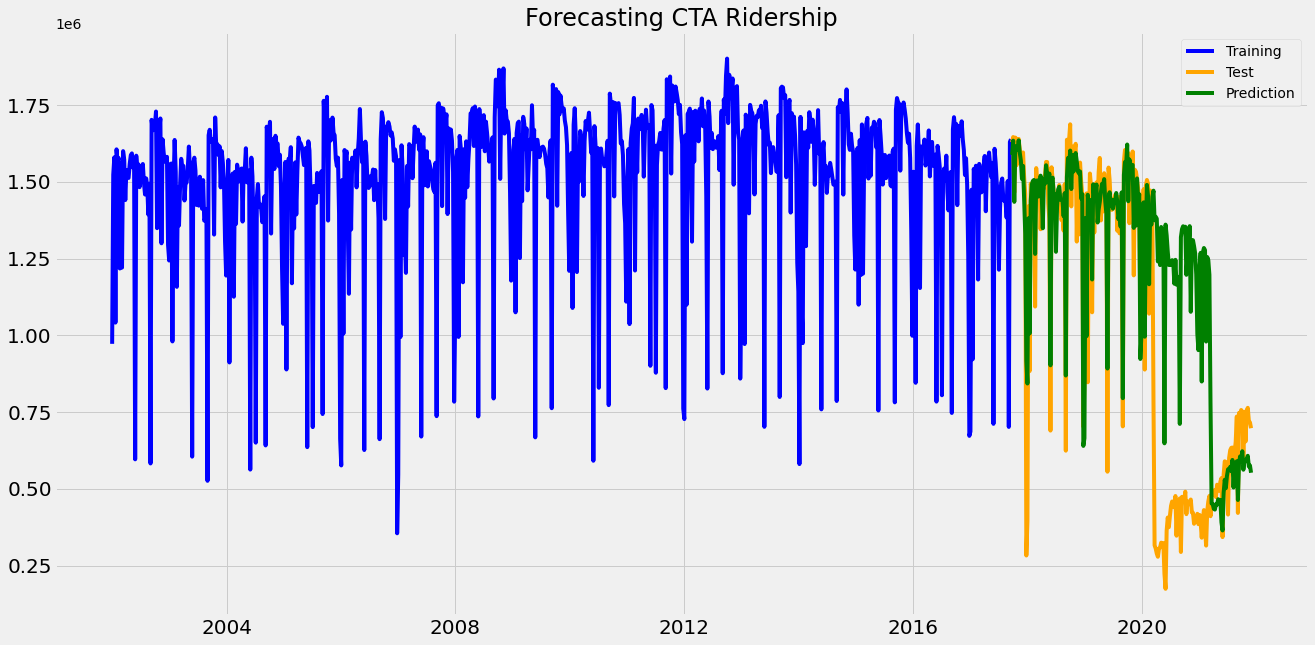

In [163]:
# Adapted from code by Hank Butler

plt.figure(figsize=(20,10))

plt.plot(y_train.index, y_train.values, color = 'blue',label='Training',)

plt.plot(y_test.index, y_test.values, color = 'orange',label='Test')

plt.plot(lm_results.predict(X_test), color = 'green',label='Prediction')
# Set label.
plt.title(label = 'Forecasting CTA Ridership', fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.legend();